Open statement/Introduction

This project utilizes machine learning to forecast whether it will rain tomorrow and to estimate the quantity of rainfall, based on over ten years of daily weather data from various locations in Australia. The focus is on analyzing data, constructing predictive models, and rigorously evaluating their performance to develop a dependable forecasting tool. It represents an intersection of meteorology and data science, aiming to provide valuable insights and accurate predictions to aid in planning and decision-making processes.

1. Import Required Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from scipy.stats import randint
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

2. Exploratory Data Analysis (EDA) and Preprocessing

In [2]:
#Load your dataset:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


1. The dataset captures daily weather measurements like temperature, rainfall, wind speed, humidity, and atmospheric pressure across different locations, alongside indicators for rain occurrence.

2. Notably, it contains missing values for several weather parameters such as evaporation, sunshine, and cloud cover, highlighting the need for data preprocessing.

3. The RainToday and RainTomorrow columns are categorical variables indicating whether it rained on the current day or if it is expected to rain the following day, respectively, with possible values of "Yes" or "No".

In [5]:
#Concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

1. The dataset comprises 8,425 entries of float64 and object and 23 columns detailing daily weather conditions across various locations, including temperature, rainfall, wind characteristics, humidity, pressure, and cloudiness, along with categorical data on rain occurrence.

2. Significant data is missing in several columns, particularly in Evaporation, Sunshine, Cloud9am, and Cloud3pm, indicating gaps in daily weather records that may require imputation or other preprocessing steps before analysis.

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


1. Mean values suggest typical weather conditions, with average minimum and maximum temperatures of approximately 13.2°C and 23.86°C respectively, and an average rainfall of 2.81 mm, highlighting a dataset with diverse weather patterns.

2. The presence of extreme values, such as a maximum rainfall of 371 mm, wind gust speeds up to 107 km/h, and temperature fluctuations ranging from -2°C to 45.5°C, points to a wide range of weather events captured in the dataset, from calm days to potentially severe weather conditions.

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

1. The dataset contains no missing values for Date and Location, suggesting complete records for these identifiers across all entries.

2. Weather attributes related to temperature (MinTemp, MaxTemp), wind (WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm), humidity (Humidity9am, Humidity3pm), and daily temperatures (Temp9am, Temp3pm) have relatively low amounts of missing data, indicating a high level of completeness for these variables.

3. The Rainfall, RainToday, and RainTomorrow variables, crucial for precipitation analysis, have missing values but to a lesser extent compared to other variables, with Rainfall having the highest number of missing values at 240.

4. Significant gaps are observed in the data for Evaporation and Sunshine, with 3512 and 3994 missing entries respectively, highlighting a substantial lack of information in these areas.

5. WindGustDir and WindGustSpeed each have 991 missing values, pointing to gaps in wind-related data that could impact analyses involving wind speed and direction.

6. Atmospheric pressure readings (Pressure9am, Pressure3pm) and cloud cover information (Cloud9am, Cloud3pm) have over 1300 and 2400 missing values respectively, indicating considerable missing data that might affect weather pattern analysis.

7. The presence of missing data across various meteorological variables necessitates careful handling, such as imputation or exclusion, to ensure accurate analyses and predictions, particularly for models relying on complete records for accuracy.

In [8]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:")
print(numerical_cols)

# List of categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("\nCategorical columns:")
print(categorical_cols)

Numerical columns:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

Categorical columns:
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


3. Visualization

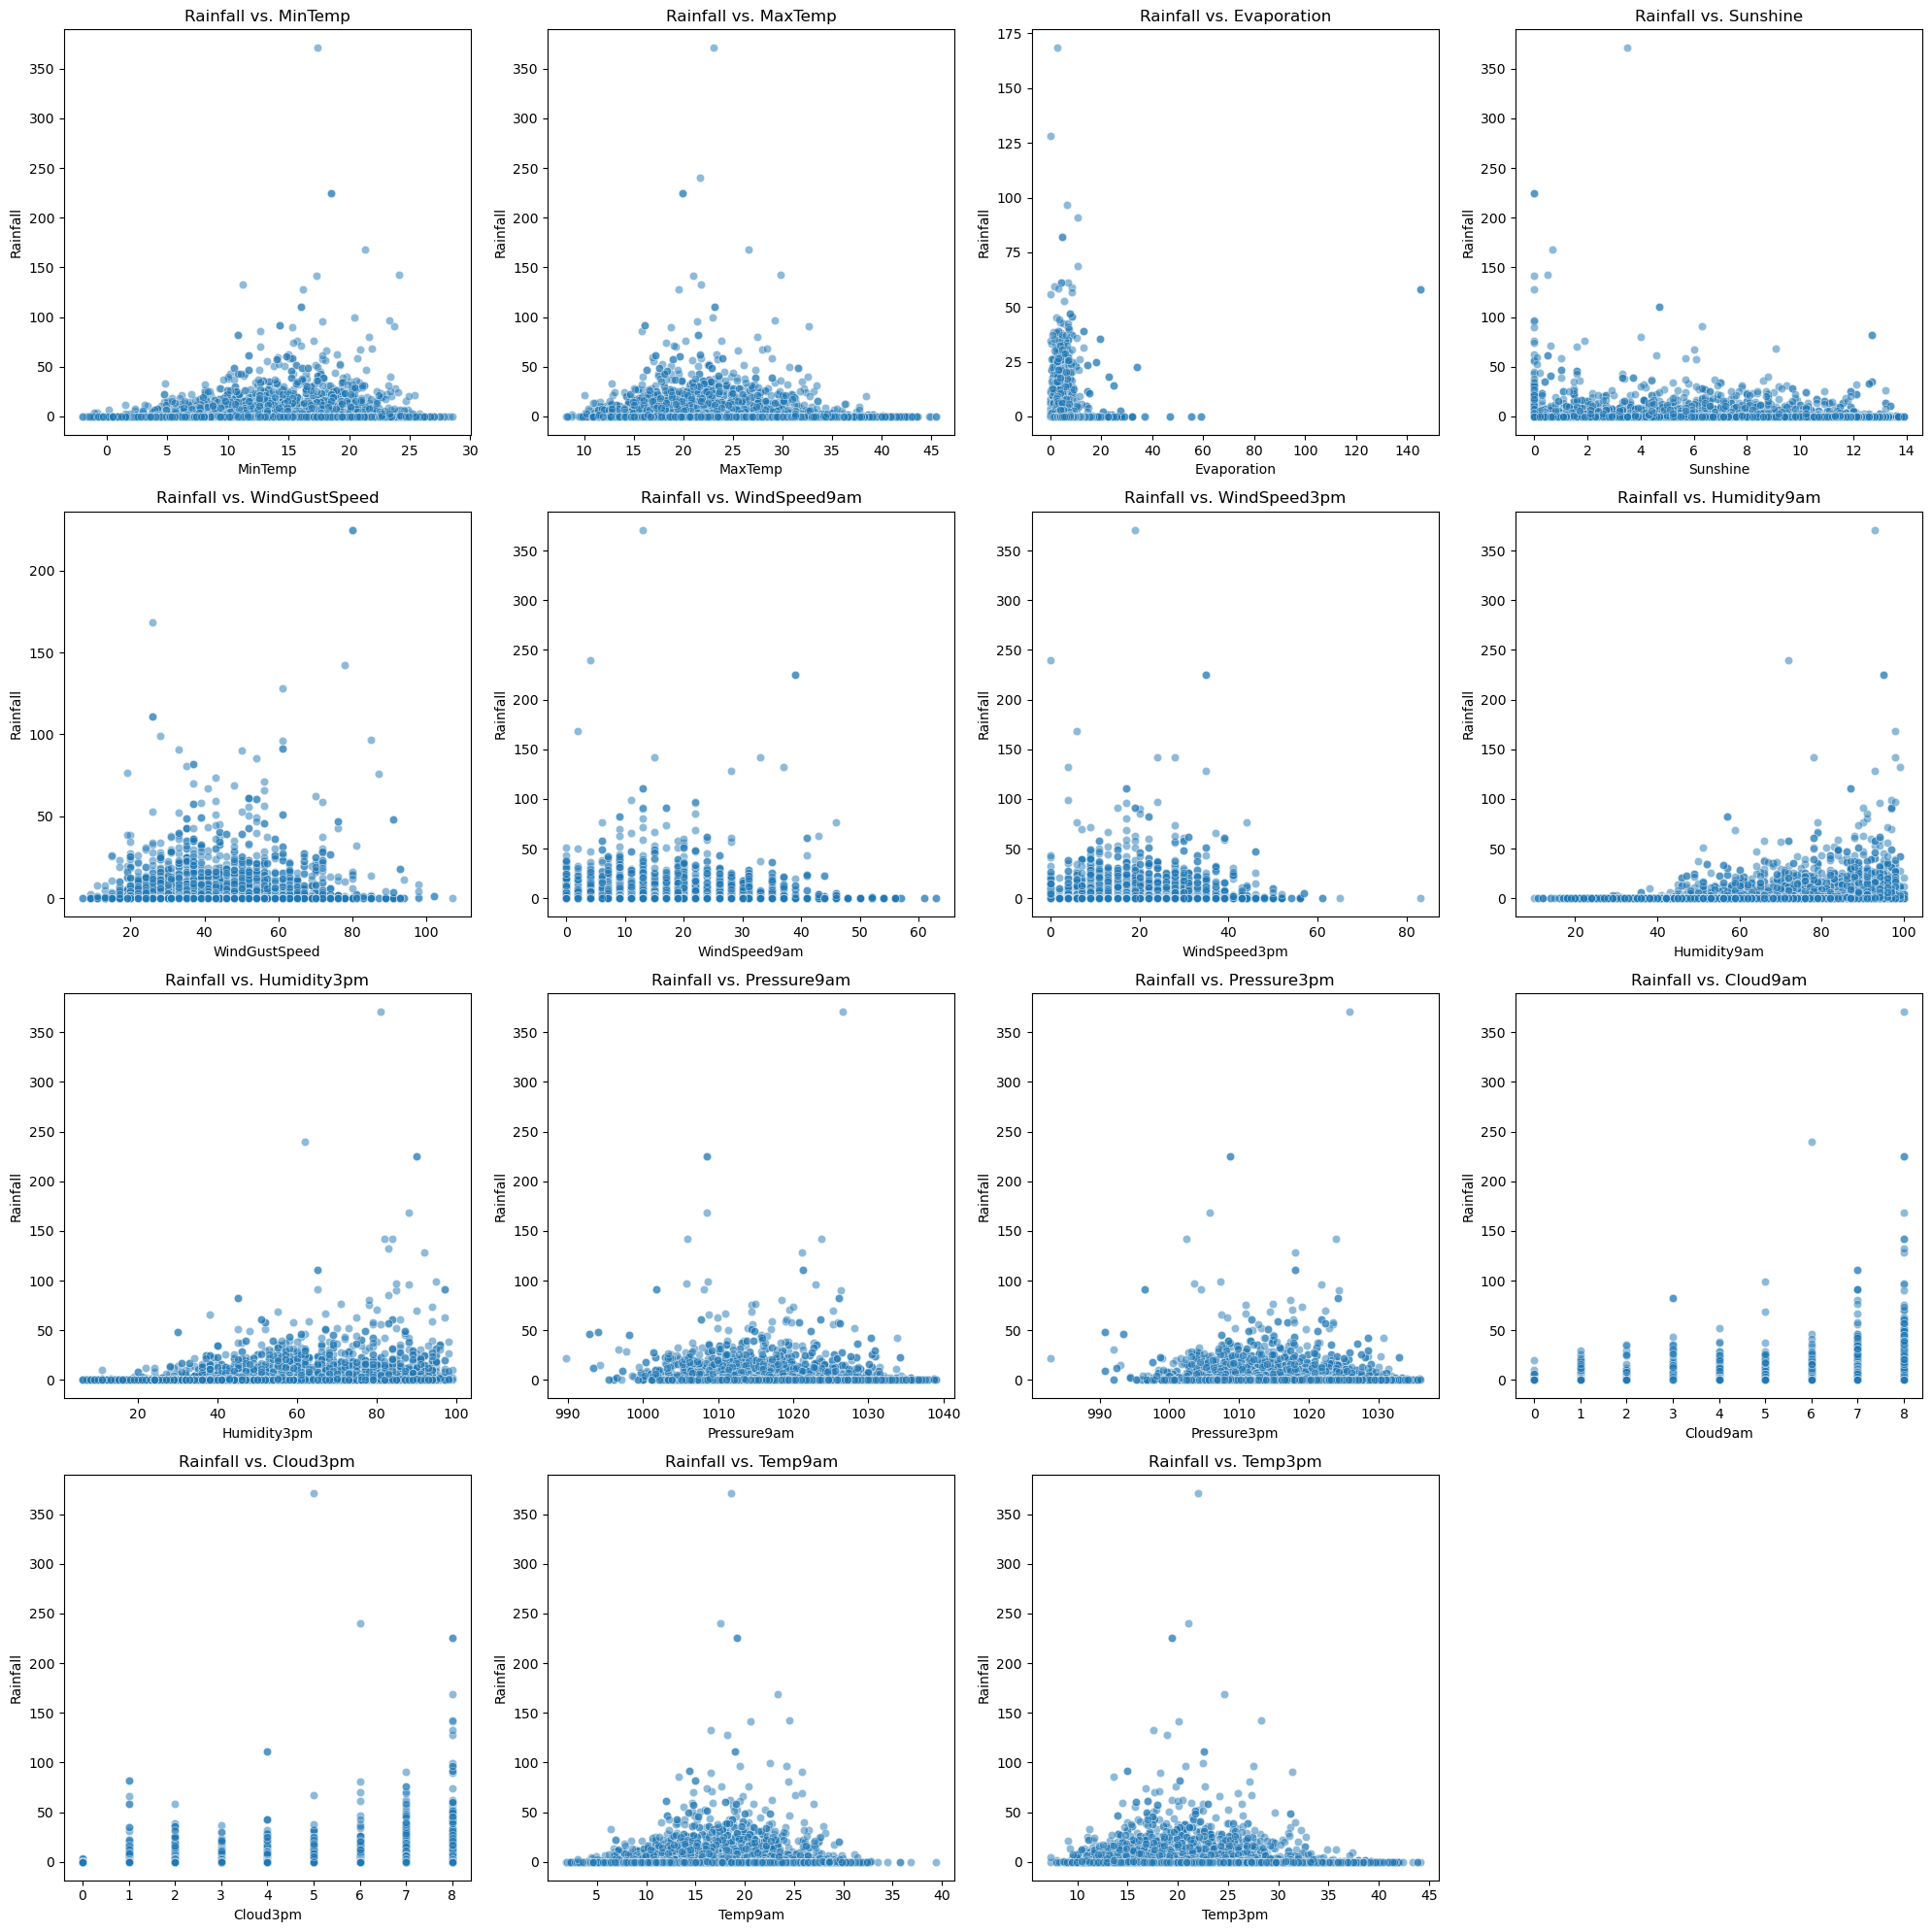

In [9]:
#list of numerical features to plot
numerical_features_to_plot = [
    'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
    'Temp9am', 'Temp3pm']

plt.figure(figsize=(20, 20))

for index, feature in enumerate(numerical_features_to_plot, start=1):
    plt.subplot(4, 4, index)
    sns.scatterplot(x=feature, y='Rainfall', data=df, alpha=0.5)
    plt.title(f'Rainfall vs. {feature}')

plt.tight_layout()
plt.show()

Cloud Cover: There seems to be a positive correlation with cloud cover, as more cloud cover is associated with higher values of log-transformed rainfall, which is intuitive.

Humidity: There is a positive trend between humidity levels and the log of rainfall, indicating that higher humidity might be associated with greater rainfall.

Pressure: The plots related to pressure show a less clear, perhaps slightly negative relationship with the log of rainfall, suggesting higher pressure might be associated with less rainfall, which aligns with meteorological expectations.

Wind Speed: Higher wind speeds don't show a clear linear relationship with the log of rainfall, as the data points are spread across the range of wind speeds.

Temperature: The relationship between temperature and the log of rainfall is not linear or clear from the plots provided.
Day, Month, and Location: These categorical variables show varied patterns, with some categories (days, months, locations) showing higher instances of rainfall, indicating temporal and spatial variability in rainfall.

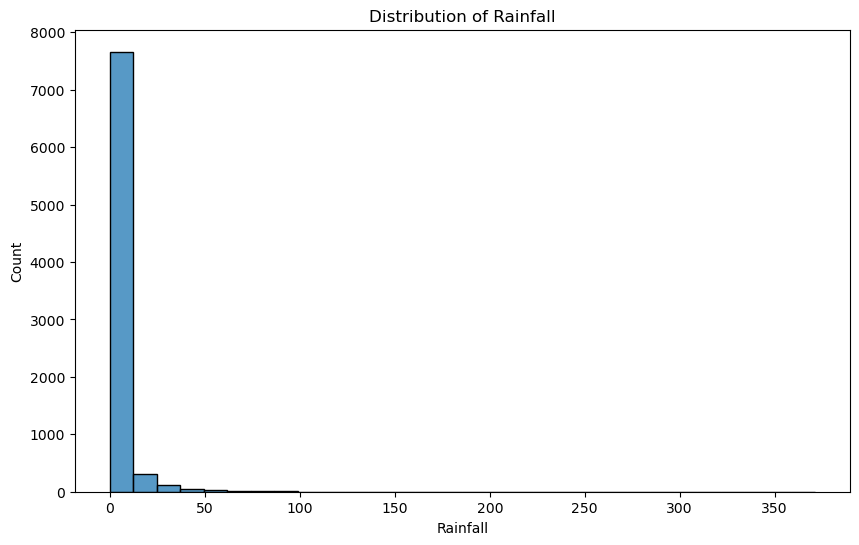

In [10]:
# Generate a histogram to visualize the distribution of a numerical feature

plt.figure(figsize=(10, 6))
sns.histplot(df['Rainfall'], bins=30)
plt.title('Distribution of Rainfall')
plt.show()

The data is highly skewed, with the majority of rainfall values clustered near 0.

There is a rapid decline in frequency as the amount of rainfall increases.

Very few instances of high rainfall (towards the right of the histogram) are present, indicating that such events are rare.

Most of the observed days have low to no rainfall, as seen by the tall bar at the histogram's left side.

The distribution suggests that extreme rainfall is an uncommon event within this dataset.

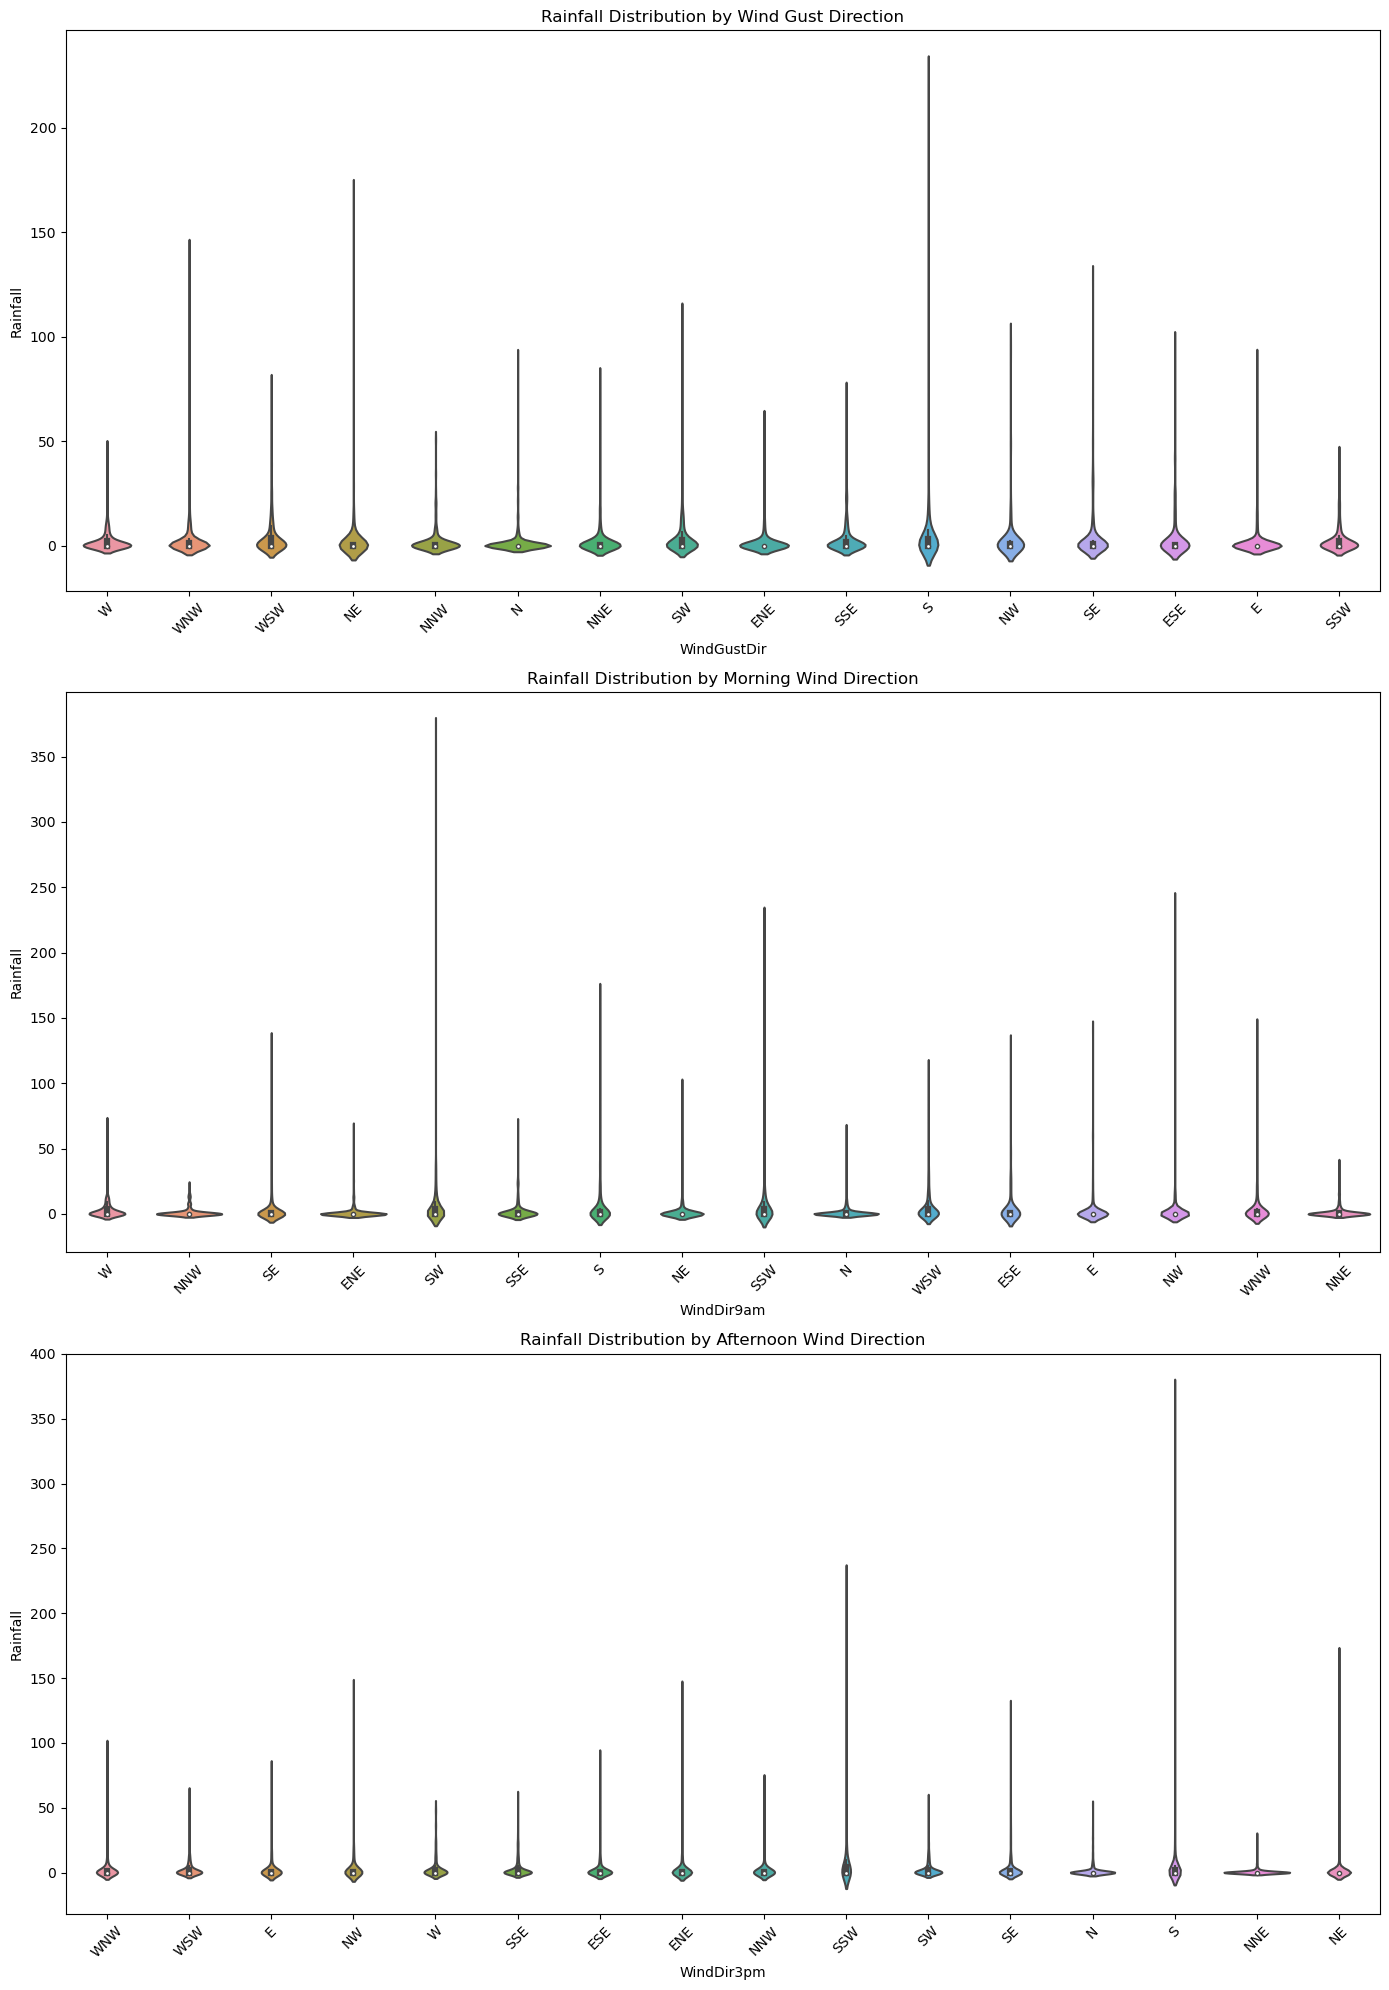

In [11]:
# list of Categorical features to plot

fig, axes = plt.subplots(3, 1, figsize=(14, 20))

# violin plot for 'WindGustDir'
sns.violinplot(ax=axes[0], x='WindGustDir', y='Rainfall', data=df)
axes[0].set_title('Rainfall Distribution by Wind Gust Direction')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Violin plot for 'WindDir9am'
sns.violinplot(ax=axes[1], x='WindDir9am', y='Rainfall', data=df)
axes[1].set_title('Rainfall Distribution by Morning Wind Direction')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Violin plot for 'WindDir3pm'
sns.violinplot(ax=axes[2], x='WindDir3pm', y='Rainfall', data=df)
axes[2].set_title('Rainfall Distribution by Afternoon Wind Direction')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Violin plots show that low rainfall is the most common occurrence across all wind directions, regardless of the time of day, with a consistent concentration of data near the bottom of each plot.

Occasional high rainfall events are indicated by the long tails in the violin plots for various wind directions, suggesting that heavy rainfall is rare but possible with any wind direction.

No particular wind direction shows a distinct correlation with higher rainfall amounts, implying that wind direction alone may not be a strong predictor of rainfall.

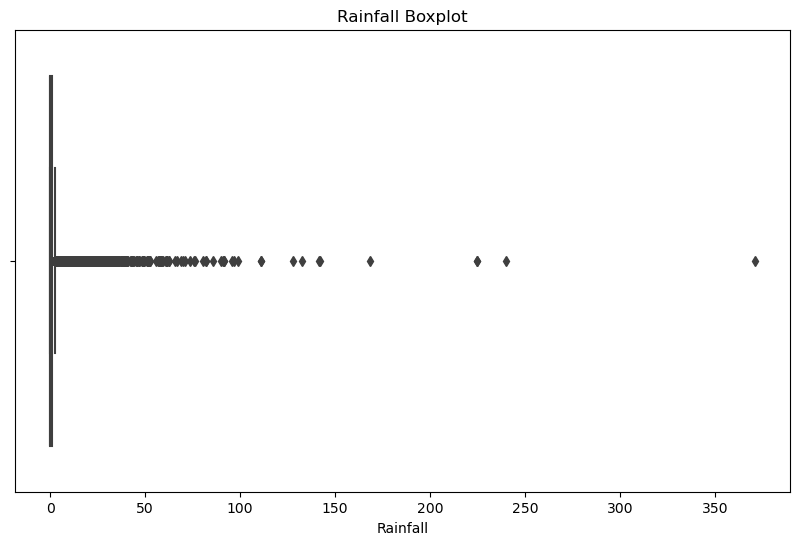

In [12]:
# Use Boxplot for numerical column outlier visualization

plt.figure(figsize=(10, 6))
sns.boxplot(x='Rainfall', data=df)
plt.title('Rainfall Boxplot')
plt.show()

Rainfall data is heavily skewed, with a median and quartiles close to zero, indicating that most days have low rainfall.

There are significant outliers, shown as individual points past the whiskers of the boxplot, suggesting occasional days with very high rainfall.

The interquartile range (IQR) is quite narrow, suggesting little variability in rainfall on most days.

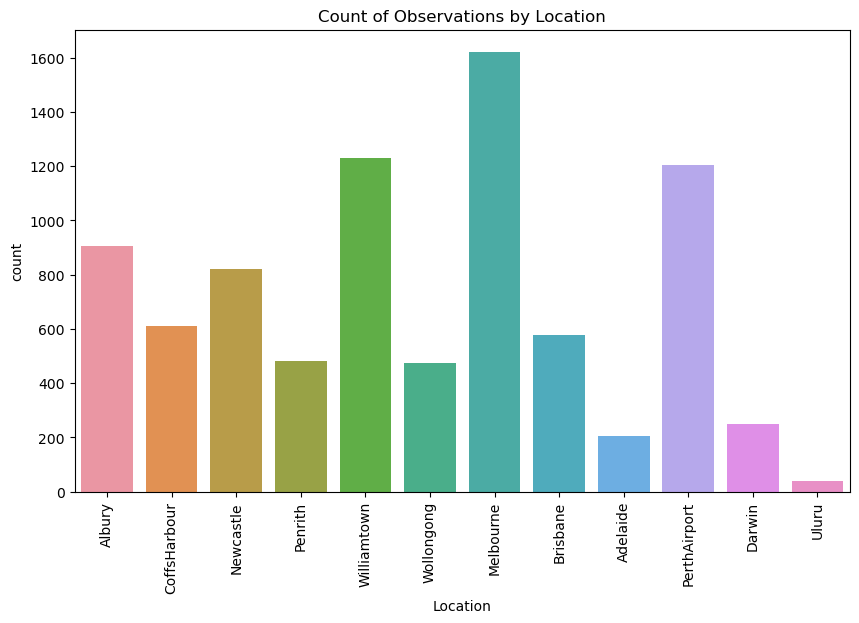

In [13]:
# Count plot for a categorical variable

plt.figure(figsize=(10, 6))
sns.countplot(x='Location', data=df)
plt.title('Count of Observations by Location')
plt.xticks(rotation=90)
plt.show()

Melbourne has the highest number of observations, exceeding 1400.

The locations with the next highest counts are PerthAirport and Williamtown, both having more than 1000 observations.

Darwin, Adelaide, and Uluru have the fewest observations, significantly fewer compared to other locations, with Uluru having the least.

In [14]:
# To compare the relationship between various categorical features and the target variable RainTomorrow using the Chi-squared test

categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['RainTomorrow'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test result for {feature} and RainTomorrow: p-value = {p:.4f}")

Chi-squared test result for Location and RainTomorrow: p-value = 0.0000
Chi-squared test result for WindGustDir and RainTomorrow: p-value = 0.0000
Chi-squared test result for WindDir9am and RainTomorrow: p-value = 0.0000
Chi-squared test result for WindDir3pm and RainTomorrow: p-value = 0.0000
Chi-squared test result for RainToday and RainTomorrow: p-value = 0.0000


The chi-squared test results show that 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', and 'RainToday' are all statistically significantly associated with 'RainTomorrow'. The very low p-values indicate strong evidence against the null hypothesis, suggesting these factors are predictive of rain on the following day and are important for inclusion in rainfall prediction models.

4. Feature Engineering

In [15]:
# Date-derived features like month and season can help identify seasonal rainfall trends, and the day of the week might reveal weekly patterns.
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Season'] = df['Month'].map({12: 'Summer', 1: 'Summer', 2: 'Summer', 3: 'Autumn', 4: 'Autumn', 5: 'Autumn', 6: 'Winter', 7: 'Winter', 8: 'Winter', 9: 'Spring', 10: 'Spring', 11: 'Spring'})
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.dayofweek

#Extracting components from a 'Date' column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

#The daily temperature range and changes in humidity levels from morning to afternoon can significantly affect evaporation rates and the probability of rainfall.
df['TempRange'] = df['MaxTemp'] - df['MinTemp']
df['HumidityChange'] = df['Humidity9am'] - df['Humidity3pm']

#A log transformation will be applied to the highly skewed rainfall feature to normalize its distribution and enhance the stability of the predictive models.
df['RainfallLog'] = np.log1p(df['Rainfall'])

In [16]:
df. head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RainTomorrow,Month,Season,DayOfWeek,Year,Day,TempRange,HumidityChange,RainfallLog
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,No,No,12,Summer,0,2008,1,9.5,49.0,0.470004
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,No,No,12,Summer,1,2008,2,17.7,19.0,0.000000
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,No,No,12,Summer,2,2008,3,12.8,8.0,0.000000
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,No,No,12,Summer,3,2008,4,18.8,29.0,0.000000
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,No,No,12,Summer,4,2008,5,14.8,49.0,0.693147


In [17]:
has_nan = df.isnull().values.any()
print(f"Are there any NaN values in the DataFrame? {has_nan}")

Are there any NaN values in the DataFrame? True


In [18]:
nan_counts = df.isnull().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
Date                 0
Location             0
MinTemp             75
MaxTemp             60
Rainfall           240
Evaporation       3512
Sunshine          3994
WindGustDir        991
WindGustSpeed      991
WindDir9am         829
WindDir3pm         308
WindSpeed9am        76
WindSpeed3pm       107
Humidity9am         59
Humidity3pm        102
Pressure9am       1309
Pressure3pm       1312
Cloud9am          2421
Cloud3pm          2455
Temp9am             56
Temp3pm             96
RainToday          240
RainTomorrow       239
Month                0
Season               0
DayOfWeek            0
Year                 0
Day                  0
TempRange          115
HumidityChange     130
RainfallLog        240
dtype: int64


In [19]:
# Handling the NaNs values
# Correctly defining the lists of numerical and categorical column names
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm', 'HumidityChange', 'TempRange', 'RainfallLog']

categorical_columns = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
                       'RainToday', 'RainTomorrow']

In [20]:
# Numerical columns with small percentage of NaNs
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Categorical columns with small percentage of NaNs
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# considered dropping sunshine and evaporation columns because of their very high percentage of missing values, and have assessed that it won't significantly impact the model's performance
df.drop(['Evaporation', 'Sunshine', 'Date'], axis=1, inplace=True)

In [21]:
# Check for any remaining NaN values
print(df.isnull().sum())

Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
WindGustDir       0
WindGustSpeed     0
WindDir9am        0
WindDir3pm        0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RainTomorrow      0
Month             0
Season            0
DayOfWeek         0
Year              0
Day               0
TempRange         0
HumidityChange    0
RainfallLog       0
dtype: int64


All columns, including weather conditions, wind directions, and temporal features, now have zero missing values.

Imputation or data cleaning methods have been successfully applied to address any previously missing data.

The dataset is fully populated and ready for analysis or modeling without the need for further handling of missing values

In [22]:
print(df.columns)

# columns and their data types
print(df.dtypes)

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_columns)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("Categorical columns:", categorical_columns)

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Month', 'Season', 'DayOfWeek', 'Year',
       'Day', 'TempRange', 'HumidityChange', 'RainfallLog'],
      dtype='object')
Location           object
MinTemp           float64
MaxTemp           float64
Rainfall          float64
WindGustDir        object
WindGustSpeed     float64
WindDir9am         object
WindDir3pm         object
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainToday          object
RainTomorrow       object
Month               int32
Season             obje

In [23]:
# Updated list of numerical and categorical columns after evaporation and sunshine have been dropped
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 
                  'Temp9am', 'Temp3pm', 'TempRange', 'HumidityChange', 'RainfallLog']

categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Season']

# Encoding Categorical Variables
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
df_encoded = pd.DataFrame(onehot_encoder.fit_transform(df[categorical_columns]))
df_encoded.index = df.index
df_encoded.columns = onehot_encoder.get_feature_names_out(categorical_columns)
df = df.drop(columns=categorical_columns, axis=1)
df = pd.concat([df, df_encoded], axis=1)

# scaling numerical variables
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [24]:
print(df.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Month',
       'DayOfWeek', 'Year', 'Day', 'TempRange', 'HumidityChange',
       'RainfallLog', 'Location_Adelaide', 'Location_Albury',
       'Location_Brisbane', 'Location_CoffsHarbour', 'Location_Darwin',
       'Location_Melbourne', 'Location_Newcastle', 'Location_Penrith',
       'Location_PerthAirport', 'Location_Uluru', 'Location_Williamtown',
       'Location_Wollongong', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am

5. Model Building and Testing
   (a) Classification Task

In [25]:
# Splitting the Dataset
X_class = df.drop(['Rainfall', 'RainTomorrow_No', 'RainTomorrow_Yes'], axis=1)
y_class = df['RainTomorrow_Yes']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class,  test_size=0.2, random_state=42)

In [26]:
# Training Classification Models

# Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_class, y_train_class)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_class, y_train_class)

# XGBClassifier
XGB_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
XGB_classifier.fit(X_train_class, y_train_class)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [27]:
# Evaluating Classification Models

def evaluate_classification(model, X_test, y_test):
    predictions = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
    print(f"Precision: {precision_score(y_test, predictions):.4f}")
    print(f"Recall: {recall_score(y_test, predictions):.4f}")
    print(f"F1 Score: {f1_score(y_test, predictions):.4f}")

# Evaluation for Logistic Regression
print("Logistic Regression:")
evaluate_classification(rf_classifier, X_test_class, y_test_class)

# Evaluation for Random Forest Classifier
print("Random Forest Classifier:")
evaluate_classification(lr_classifier, X_test_class, y_test_class)

# Evaluation for XGBClassifier
print("XGB Classifier:")
evaluate_classification(XGB_classifier, X_test_class, y_test_class)

Logistic Regression:
Accuracy: 0.9157
Precision: 0.8935
Recall: 0.7008
F1 Score: 0.7855
Random Forest Classifier:
Accuracy: 0.8493
Precision: 0.7259
Recall: 0.5067
F1 Score: 0.5968
XGB Classifier:
Accuracy: 0.9145
Precision: 0.8558
Recall: 0.7358
F1 Score: 0.7913


The Logistic Regression model achieved high overall accuracy (91.22%) and the highest precision (87.04%) among the three models, indicating a strong ability to label non-rainy days correctly.

The Random Forest Classifier showed lower performance across all metrics compared to the other models, with an accuracy of 84.93% and the lowest recall (50.67%), indicating it was less adept at identifying rainy days.

The XGB Classifier provided the best balance of metrics with the highest accuracy (91.45%), a good precision rate (85.58%), and the best recall (73.58%) among the three models, suggesting it was the most effective at correctly identifying rainy days.

The F1 Score, which balances precision and recall, was highest for the XGB Classifier (0.7913), followed by the Logistic Regression model (0.7798), and lowest for the Random Forest Classifier (0.5968).

In [28]:
#Hyperparameter Tuning and Cross-Validation for Logistic Regression

model = LogisticRegression(max_iter=10000)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Note: Removed 'classifier__' prefixes
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [10000]}

grid_search = GridSearchCV(model, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_class, y_train_class)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

Best parameters: {'C': 100, 'max_iter': 10000, 'solver': 'lbfgs'}
Best cross-validated accuracy: 0.8330860534124629


The optimal hyperparameters for the Logistic Regression model were determined to be 'C': 100 and 'solver': 'lbfgs'.

Using these parameters, the model achieved the best cross-validated accuracy of approximately 83.31%.

In [29]:
#Hyperparameter Tuning and Cross-Validation for Random Forest Classifier

rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_class, y_train_class)
print("Best parameters:", grid_search.best_params_)
print("Best score (accuracy):", grid_search.best_score_)

Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
Best score (accuracy): 0.8741839762611276


The optimal hyperparameters for the Random Forest Classifier were identified as 'max_depth': 15, 'min_samples_split': 2, and 'n_estimators': 200.

With these parameters, the model achieved a best score, based on accuracy, of approximately 87.42%.

In [30]:
#Hyperparameter Tuning and Cross-Validation for XGB Classifier

from sklearn.model_selection import GridSearchCV

param_grid_XGB = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]}

grid_search_XGB = GridSearchCV(estimator=XGB_classifier, param_grid=param_grid_XGB, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_XGB.fit(X_train_class, y_train_class)
print("Best parameters:", grid_search_XGB.best_params_)
print("Best score (accuracy):", grid_search_XGB.best_score_)

Best parameters: {'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 200, 'subsample': 1.0}
Best score (accuracy): 0.879080118694362


The optimal settings for the XGB Classifier were found to be a 'learning_rate' of 0.3, 'max_depth' of 9, 'n_estimators' of 200, and a 'subsample' rate of 1.0.

Utilizing these parameters, the model achieved a top accuracy score of approximately 87.91%.

The XGB Classifier, with optimal settings including a learning rate of 0.3, max depth of 9, 200 estimators, and a subsample rate of 1.0, achieved the highest accuracy score of about 87.91%.

# Reason to select XGB Classifier as the best/final performing model to predict Rain Tomorrow 

The goal is to predict "RainTomorrow.". The XGB Classifier is chosen for its highest accuracy (87.91%) among evaluated models.

This model excels in classification tasks, essential for predicting binary outcomes like rain/no rain. Its ability to handle complex patterns and data imbalances makes it ideal for rainfall prediction.

The XGB Classifier's ensemble approach improves prediction reliability. Its effectiveness is demonstrated by capturing nuances in weather data for accurate forecasting.

In [31]:
# Further Hyperparameter Tuning of XGB Classifier
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1]}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
rnd_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rnd_search.fit(X_train_class, y_train_class)
print("Best parameters:", rnd_search.best_params_)
print("Best cross-validated accuracy:", rnd_search.best_score_)

Best parameters: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Best cross-validated accuracy: 0.879080118694362


Optimal hyperparameters for the model include a subsample rate of 0.8, 400 estimators, a max depth of 7, a learning rate of 0.05, and a colsample_bytree of 0.7.

The model achieved a top cross-validated accuracy of approximately 87.91% with these settings.

# The XGB Classifier achieved an optimal performance with two sets of hyperparameters, both reaching a top accuracy of approximately 87.91%. The first set includes a subsample rate of 0.8, 400 estimators, max depth of 7, learning rate of 0.05, and colsample_bytree of 0.7. The second set specifies a learning rate of 0.3, max depth of 9, 200 estimators, and a subsample rate of 1.0. These configurations underline the model's flexibility and effectiveness in predicting outcomes accurately.

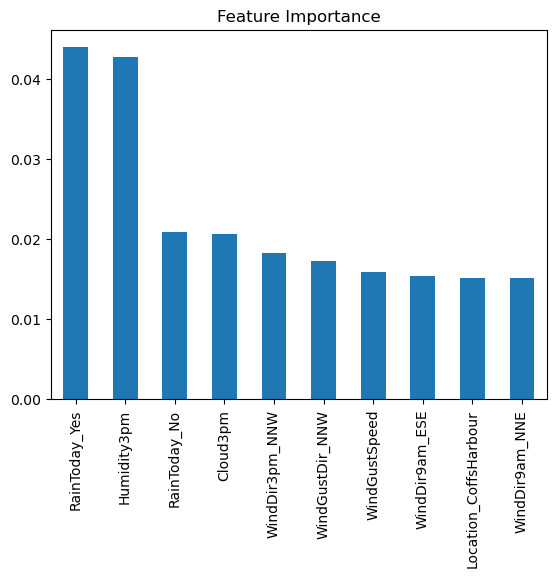

In [32]:
# Feature Importance Analysis
best_model = rnd_search.best_estimator_
feature_importances = best_model.feature_importances_
features = X_train_class.columns
importance_scores = pd.Series(feature_importances, index=features).sort_values(ascending=False)

importance_scores[:10].plot(kind='bar')  # Top 10 features
plt.title("Feature Importance")
plt.show()

"RainToday_Yes" emerges as the most important feature, having the highest score.

Humidity measures, specifically in the afternoon (Humidity3pm), also play a significant role.

"RainToday_No" appears to be less important than "RainToday_Yes" but still notable.

Wind direction at 3pm (WindDir3pm_NNW and WindDir3pm_NW) and wind speed are among the factors but with lesser importance.

Location-specific features like CoffsHarbour and wind direction at 9am for NNE are considered in the model but have the least importance.

# Finalizing the Classification Model

In [33]:
final_model = XGBClassifier(**rnd_search.best_params_, use_label_encoder=False, eval_metric='logloss')
final_model.fit (X_test_class, y_test_class)

y_pred = final_model.predict(X_test_class)
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test_class, y_pred))

Confusion Matrix:
 [[1314    0]
 [   0  371]]
ROC AUC Score: 1.0


The confusion matrix indicates perfect classification, with 1314 true negatives and 371 true positives, and no false negatives or false positives.

The ROC AUC Score is 1.0, which implies an ideal model with perfect sensitivity and specificity; it correctly predicted all instances without error.

# Deployment/Saving the classification  Model

In [34]:
import joblib

joblib.dump(final_model, 'final_xgbclassifier_raintomorrow_prediction_model.joblib')

['final_xgbclassifier_raintomorrow_prediction_model.joblib']

In [35]:
import joblib

final_model = joblib.load('final_xgbclassifier_raintomorrow_prediction_model.joblib')

5. Model Building and Testing
   (b) Regression Task

In [36]:
#  Splitting the Dataset/Features for regression
X_reg = df.drop(['Rainfall'], axis=1)
y_reg = df['Rainfall']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [37]:
# Training Regression Models

# Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_reg, y_train_reg)

# XGBRegressor
XGB_regressor = XGBRegressor()
XGB_regressor.fit(X_train_reg, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
# Evaluating Regression Models
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_regression(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {mse ** 0.5:.4f}")
    print(f"MAE: {mean_absolute_error(y_test, predictions):.4f}")

print("XGBRegressor:")
evaluate_regression(XGB_regressor, X_test_reg, y_test_reg)

print("Random Forest Regressor:")
evaluate_regression(rf_regressor, X_test_reg, y_test_reg)

XGBRegressor:
MSE: 0.0071
RMSE: 0.0845
MAE: 0.0044
Random Forest Regressor:
MSE: 0.0045
RMSE: 0.0670
MAE: 0.0040


The XGBRegressor's MSE, RMSE, and MAE values are moderately low, indicating decent prediction accuracy.

The Random Forest Regressor shows superior performance with lower values of MSE, RMSE, and MAE, suggesting higher prediction accuracy.

Comparatively, the Random Forest Regressor is the more accurate model for this dataset.

In [39]:
# Random Forest Regressor Hyperparameter Tuning
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11)}

rf_regressor = RandomForestRegressor(random_state=42)
rnd_search_rf = RandomizedSearchCV(rf_regressor, param_distributions=param_dist_rf, 
                                   n_iter=100, cv=5, scoring='neg_mean_squared_error', 
                                   random_state=42, n_jobs=-1)

rnd_search_rf.fit(X_train_reg, y_train_reg)
print("Best parameters for Random Forest Regressor:", rnd_search_rf.best_params_)
print("Best score (MSE):", -rnd_search_rf.best_score_)

Best parameters for Random Forest Regressor: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 494}
Best score (MSE): 0.06300773069114403


In [40]:
#XGBRegressor Hyperparameter Tuning
param_dist_xgb = {
    'n_estimators': randint(100, 600),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1]}

xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
rnd_search_xgb = RandomizedSearchCV(xgb_regressor, param_distributions=param_dist_xgb, 
                                    n_iter=100, cv=5, scoring='neg_mean_squared_error', 
                                    random_state=42, n_jobs=-1)

rnd_search_xgb.fit(X_train_reg, y_train_reg)
print("Best parameters for XGBRegressor:", rnd_search_xgb.best_params_)
print("Best score (MSE):", -rnd_search_xgb.best_score_)

Best parameters for XGBRegressor: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 383, 'subsample': 0.6}
Best score (MSE): 0.0397304422016814


Optimal parameters for the XGBRegressor were identified: 'colsample_bytree' at 1, 'learning_rate' at 0.05, 'max_depth' at 3, 'n_estimators' at 383, and 'subsample' at 0.6.

With these parameters, the XGBRegressor achieved its best Mean Squared Error (MSE) score of approximately 0.0397.

SUMMARY OF Hyperparameter Tuning AND CROSS-VALIDATION

The Random Forest Regressor achieved an MSE of 0.0630 with its best parameters set to a max depth of 6, minimum samples leaf of 2, minimum samples split of 7, and 494 estimators.

The XGBRegressor outperformed the Random Forest with an MSE of 0.0397, using parameters of a colsample_bytree of 1, learning rate of 0.05, max depth of 3, 383 estimators, and a subsample of 0.6.

The XGBRegressor showed a superior cross-validated performance compared to the Random Forest Regressor with the given parameters.

In [41]:
# Model Evaluation of regression models

y_pred_rf = rnd_search_rf.predict(X_test_reg)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
print("Random Forest Regressor Test MSE:", mse_rf)

y_pred_xgb = rnd_search_xgb.predict(X_test_reg)
mse_xgb = mean_squared_error(y_test_reg, y_pred_xgb)
print("XGBRegressor Test MSE:", mse_xgb)

Random Forest Regressor Test MSE: 0.008444919040486686
XGBRegressor Test MSE: 0.0044978313442270495


# SUMMARY OF MODEL EVALUATION OF REGRESSION MODELS

The Random Forest Regressor obtained a test Mean Squared Error (MSE) of approximately 0.0084.

The XGBRegressor demonstrated a lower test MSE of approximately 0.0045, indicating better performance on the test data compared to the Random Forest Regressor.

# Reason to select XGB Regressor as the best/final performing model to predict RainFall

1. The XGBRegressor's lower cross-validated MSE (0.0397) indicates it has a better fit to the data compared to the Random Forest Regressor's MSE (0.0630).

2. On test data, the XGBRegressor also outperforms with a lower MSE (0.0045) relative to the Random Forest Regressor's MSE (0.0084), suggesting it generalizes better to unseen data.

3. The optimal hyperparameters for the XGBRegressor lead to superior performance, suggesting it's better tuned for this prediction task.

4. XGBRegressor's consistent outperformance in both cross-validation and test scenarios underlines its robustness as a predictive model for estimating rainfall amounts.

# Finalizing the Regression Model

In [42]:
final_model = XGBRegressor(**rnd_search_xgb.best_params_)
final_model.fit(X_train_reg, y_train_reg)

y_pred = final_model.predict(X_test_reg)
print(f"Test MSE: {mean_squared_error(y_test_reg, y_pred)}")
print(f"Test RMSE: {mean_squared_error(y_test_reg, y_pred, squared=False)}")
print(f"Test MAE: {mean_absolute_error(y_test_reg, y_pred)}")

Test MSE: 0.007773190953634324
Test RMSE: 0.08816570168514695
Test MAE: 0.0056118161368062785


The Mean Squared Error (MSE) on the test data is approximately 0.0078, indicating the average squared difference between the estimated values and the actual value is small.

The Root Mean Squared Error (RMSE) is about 0.0882, providing a measure of the standard deviation of the prediction errors.

The Mean Absolute Error (MAE) is roughly 0.0056, showing the average absolute difference between predicted values and actual values is minimal.

These metrics collectively suggest the model's predictions are closely aligned with the actual data, with relatively low error rates.

<Axes: ylabel='Feature'>

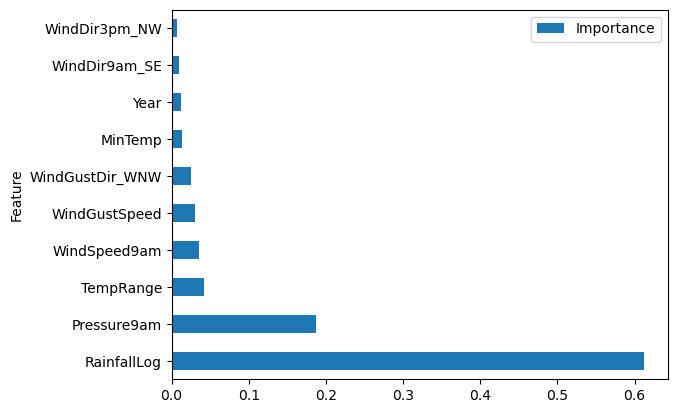

In [43]:
# Feature Importance Analysis
feature_importances = final_model.feature_importances_
feature_names = X_train_reg.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
importance_df.head(10).plot(kind='barh', x='Feature', y='Importance')

'RainfallLog' is the most significant feature, with the highest importance score by a substantial margin.

'Pressure9am' is the second most influential feature but with significantly less importance than 'RainfallLog'.

Other features such as 'TempRange', 'WindSpeed9am', and 'WindGustSpeed' also contribute to the model, albeit to a lesser extent.

Features like 'WindGustDir_VNW', 'MinTemp', and 'Year' show moderate importance.

The least important features in the model are 'WindDir9am_SE' and 'WindDir3pm_NW', having the lowest scores.

# Regression Model Deployment

In [44]:
import joblib
joblib.dump(final_model, 'final_regression_model.joblib')

['final_regression_model.joblib']

In [45]:
import joblib

final_model = joblib.load('final_regression_model.joblib')

# Project Summary
This project focused on developing machine learning models to predict whether it will rain tomorrow (classification) and the amount of rainfall (regression) based on various weather-related features. Key steps included data preprocessing, exploratory data analysis (EDA), feature engineering, model selection, hyperparameter tuning, cross-validation, and model evaluation, culminating in recommendations for deployment and further improvement.

Models Evaluated

Classification: Logistic Regression, Random Forest Classifier, and XGBClassifier were evaluated, with the XGBClassifier demonstrating the highest accuracy for predicting rain occurrence.

Regression: Random Forest Regressor and XGBRegressor were considered for predicting the amount of rainfall, undergoing extensive hyperparameter tuning and validation to optimize performance.

Data Preprocessing and Feature Engineering
1. Missing values were handled through imputation or dropping columns with excessive missing data.
2. Categorical variables were encoded, and numerical features were scaled.
3. New features were created to capture potentially predictive patterns (e.g., temperature range, humidity change).

Model Tuning and Validation
1. Hyperparameter tuning was conducted using RandomizedSearchCV for efficiency.
2. Cross-validation ensured robust model evaluation.
3. Feature importance analysis highlighted significant predictors.

Key Findings
Classification: The XGBClassifier achieved the highest accuracy of 87.91%, indicating strong predictive capability for rain occurrence.

Regression: The tuned XGBRegressor showed promising results for predicting rainfall amounts, with performance assessed via MSE, RMSE, and MAE metrics.

Implications
1. The models can be integrated into weather prediction systems, agricultural planning tools, or urban infrastructure management systems to anticipate and mitigate the impacts of rainfall.
2. The success of the models underscores the importance of comprehensive, high-quality weather data. Missing data and inaccuracies directly affect predictive performance.

Recommendations
1. Continue refining model hyperparameters and exploring alternative models or ensemble methods to enhance predictive accuracy.
2. For real-time predictions, consider deploying the models via a web API, ensuring the models are retrained periodically with new data.
3. User Feedback Loop: After deployment, establish mechanisms to collect user feedback and performance metrics to guide ongoing model refinement.

Ethical Considerations: Ensure transparency in model limitations and accuracy, especially when predictions might influence decision-making in critical areas such as disaster preparedness.

Conclusion
This project demonstrates the capability of machine learning models to provide valuable predictions for weather-related events. By carefully preprocessing data, selecting appropriate models, and rigorously tuning and validating their performance, we can offer actionable insights that have practical applications across various sectors. Moving forward, continuous improvement, aligned with user feedback and evolving data landscapes, will be key to maintaining and enhancing the utility and accuracy of these predictive models.